### 0. Install and import dependencies

In [ ]:
!sudo apt-get install libkrb5-dev -q

In [2]:
!pip install arcgis==1.8.4 torch==1.4.0 fastai==1.0.60 torchvision==0.5.0 -q

     |████████████████████████████████| 2.7 MB 5.3 MB/s 
     |████████████████████████████████| 753.4 MB 7.2 kB/s 
     |████████████████████████████████| 237 kB 50.5 MB/s 
     |████████████████████████████████| 4.0 MB 42.7 MB/s 
     |████████████████████████████████| 355 kB 58.4 MB/s 
     |████████████████████████████████| 346 kB 53.6 MB/s 
     |████████████████████████████████| 346 kB 70.7 MB/s 
     |████████████████████████████████| 346 kB 75.4 MB/s 
     |████████████████████████████████| 346 kB 71.6 MB/s 
     |████████████████████████████████| 346 kB 72.0 MB/s 
     |████████████████████████████████| 346 kB 72.9 MB/s 
     |████████████████████████████████| 344 kB 59.3 MB/s 
     |████████████████████████████████| 344 kB 57.2 MB/s 
     |████████████████████████████████| 344 kB 71.1 MB/s 
     |████████████████████████████████| 342 kB 70.8 MB/s 
     |████████████████████████████████| 343 kB 72.0 MB/s 
     |████████████████████████████████| 8.8 MB 46.7 MB/s 
     |████████

In [1]:
from pathlib import Path
import os, json

from arcgis.learn import prepare_data, ImageCaptioner
from arcgis.gis import GIS

In [ ]:
!pip list

In [8]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 3.3 MB/s 
  Using cached pybind11-2.10.1-py3-none-any.whl (216 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3163023 sha256=71dcfaad3da8115bcebb840a0f4775d1fa1222698695694830daaf60ee87fd32
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [7]:
!pip uninstall spacy
!pip install spacy==2.2.4

Found existing installation: spacy 3.4.3
Uninstalling spacy-3.4.3:
  Would remove:
    /usr/local/bin/spacy
    /usr/local/lib/python3.7/dist-packages/spacy-3.4.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/spacy/*
Proceed (y/n)? y
  Successfully uninstalled spacy-3.4.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.6 MB 5.1 MB/s 
     |████████████████████████████████| 3.7 MB 46.9 MB/s 
     |████████████████████████████████| 208 kB 55.6 MB/s 
     |████████████████████████████████| 2.2 MB 41.4 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.5
    Uninstalling srsly-2.4.5:
      Successfully uninstalled srsly-2.4.5
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: blis
    Found existing installation: blis 0.7.9
  

### 1. Model training

In [2]:
filepath = r'/content/drive/MyDrive/ImageCaptioning'

In [ ]:
import zipfile
with zipfile.ZipFile(filepath, 'r') as zip_ref:
    zip_ref.extractall(Path(filepath).parent)

In [3]:
data_path = Path(os.path.join(os.path.splitext(filepath)[0]))

In [4]:
data = prepare_data(data_path, 
                    chip_size=224,
                    batch_size=4,
                    dataset_type='ImageCaptioning')

/usr/local/lib/python3.7/dist-packages/arcgis/learn/models/_arcgis_model.py:336: UserWarning: Cuda is not available
  warnings.warn("Cuda is not available")


#### 1.1 Visualize training data

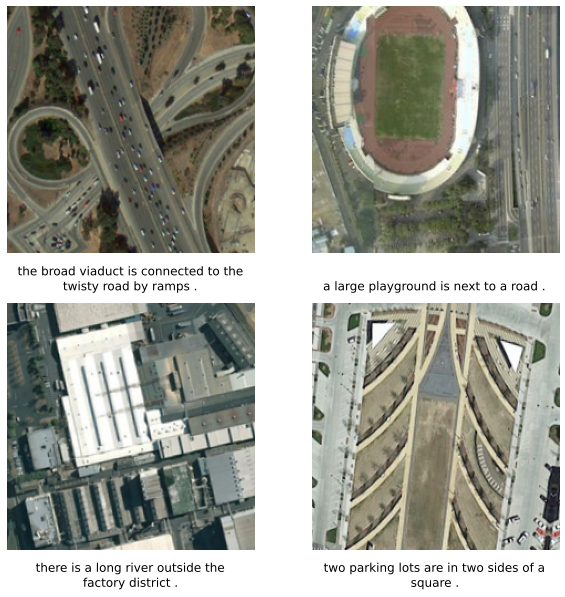

In [5]:
data.show_batch()

#### 1.2 Load Model Architecture

In [6]:
ic = ImageCaptioner(data, backbone='resnet50')

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

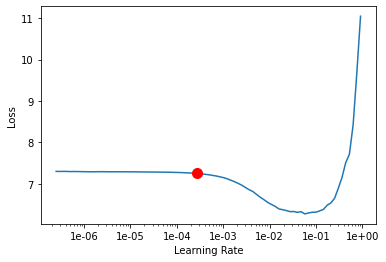

In [7]:
lr = ic.lr_find()

#### 1.3 Train the model

In [8]:
ic.fit(1, lr, early_stopping=True)

epoch,train_loss,valid_loss,accuracy,bleu,time
0,3.115167,2.994159,0.409489,0.107636,3:31:44


#### 1.4 Visualize results on validation set

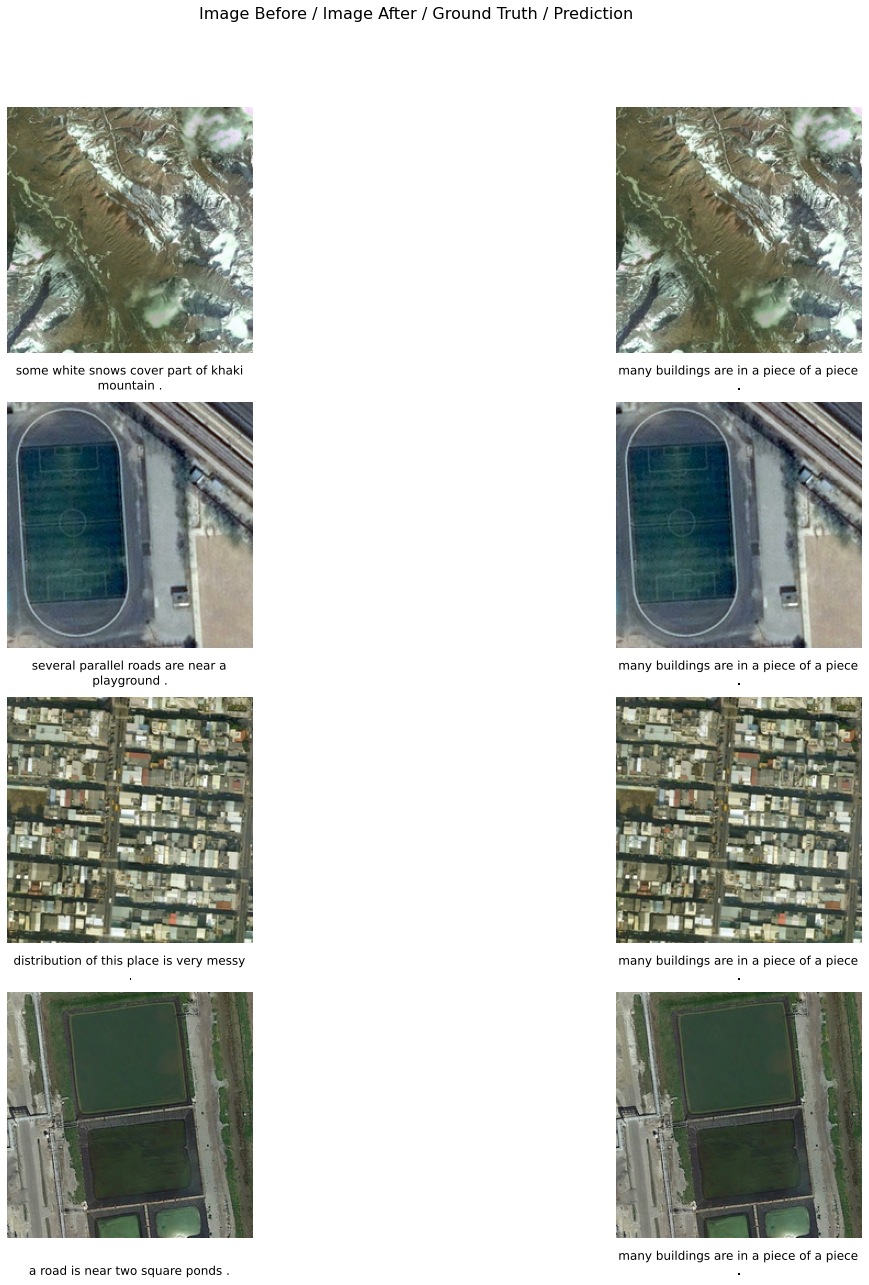

In [9]:
ic.show_results()

#### 1.5 Evaluate model performance

In [10]:
ic.bleu_score()

{'bleu-1': 0.4842032967032967,
 'bleu-2': 0.15620094191522763,
 'bleu-3': 0.0898962148962149,
 'bleu-4': 0.049267399267399266,
 'BLEU': 0.08945190984446857}

#### 1.6 Save the model

In [11]:
ic.save('image-captioner-01epochs')

Computing model metrics...


PosixPath('models/image-captioner-01epochs')

#### 1.7 Prediction on test image

'many green trees are in a piece .'

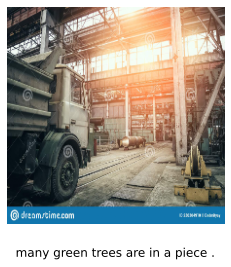

In [12]:
ic.predict(r'/content/big-cargo-freight-truck-inside-metallurgical-factory-workshop-interior-230304910.jpg')

### 2. Export and download the model

In [13]:
!zip -r /content/models.zip /content/models

  adding: content/models/ (stored 0%)
  adding: content/models/image-captioner-01epochs/ (stored 0%)
  adding: content/models/image-captioner-01epochs/image-captioner-01epochs.pth (deflated 7%)
  adding: content/models/image-captioner-01epochs/ModelCharacteristics/ (stored 0%)
  adding: content/models/image-captioner-01epochs/ModelCharacteristics/show_results.png (deflated 4%)
  adding: content/models/image-captioner-01epochs/ModelCharacteristics/loss_graph.png (deflated 5%)
  adding: content/models/image-captioner-01epochs/image-captioner-01epochs.dlpk (deflated 0%)
  adding: content/models/image-captioner-01epochs/image-captioner-01epochs.emd (deflated 54%)
  adding: content/models/image-captioner-01epochs/vocab (deflated 56%)
  adding: content/models/image-captioner-01epochs/model_metrics.html (deflated 26%)
  adding: content/models/tmp.pth (deflated 7%)
  adding: content/models/checkpoint_2022-11-23_07-11-35/ (stored 0%)
  adding: content/models/checkpoint_2022-11-23_07-11-35/Model

In [14]:
from google.colab import files
files.download("/content/models.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>